In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette('coolwarm')

# 加载数据集
data_no_g3 = pd.read_csv("cw_data_clear_grade3.csv")

# 决策树-特征选择

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

Best parameters: {'max_depth': 4, 'min_samples_split': 3}
              precision    recall  f1-score   support

           1       0.69      0.76      0.72        71
           2       0.28      0.26      0.27        39
           4       0.52      0.49      0.51        65

    accuracy                           0.55       175
   macro avg       0.50      0.50      0.50       175
weighted avg       0.54      0.55      0.54       175


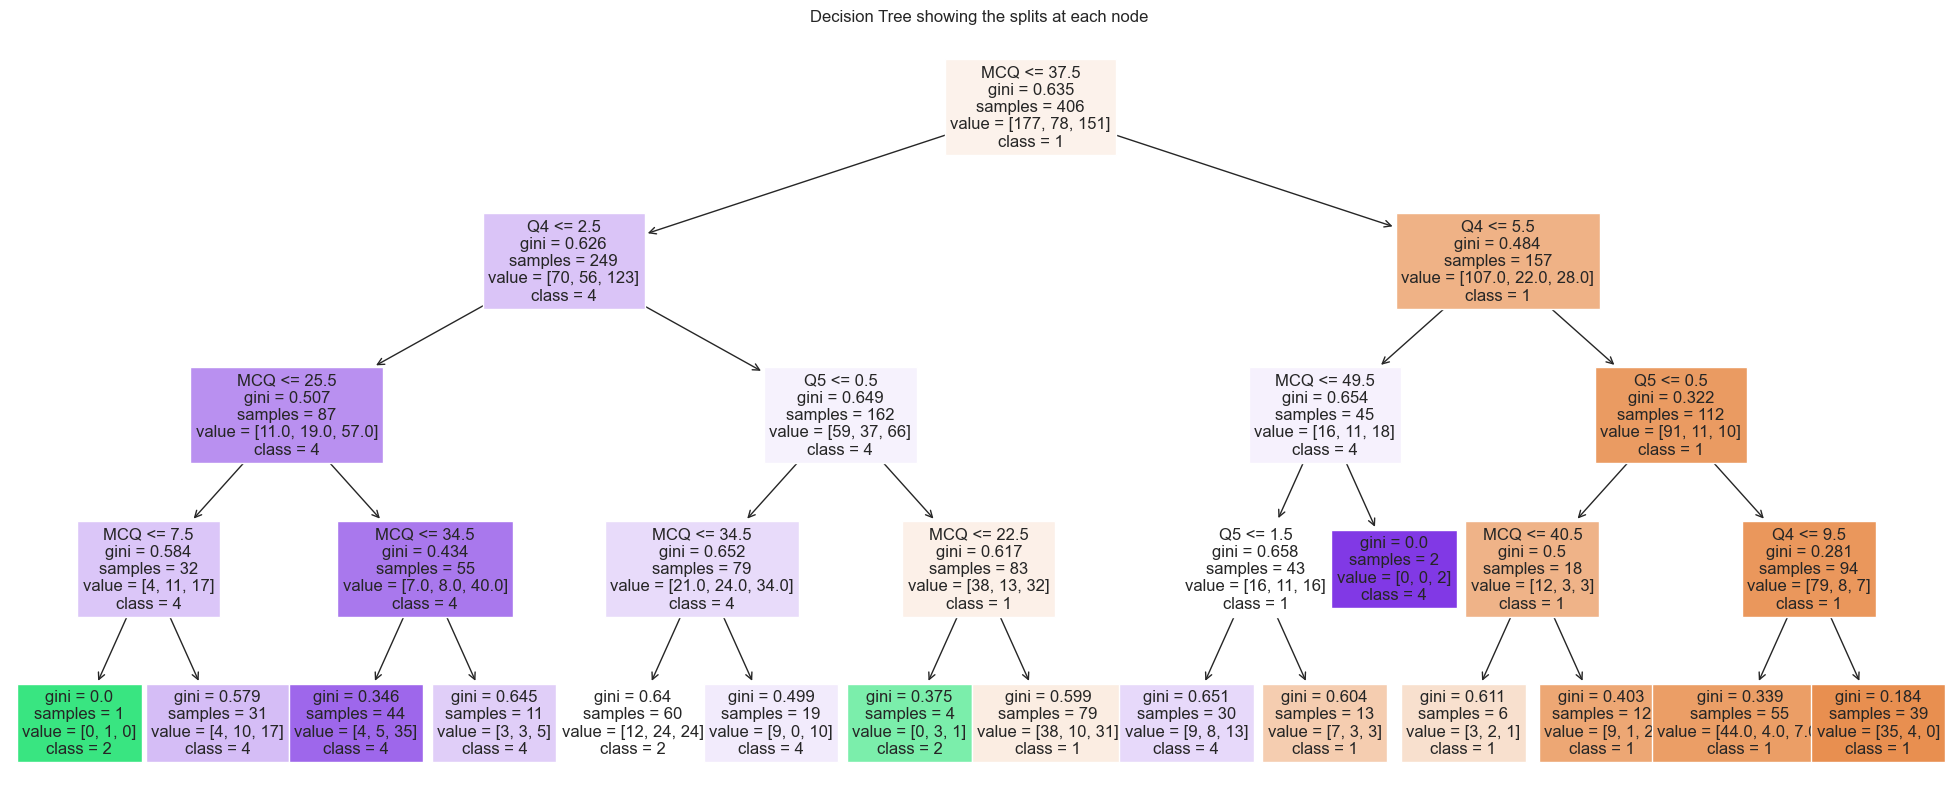

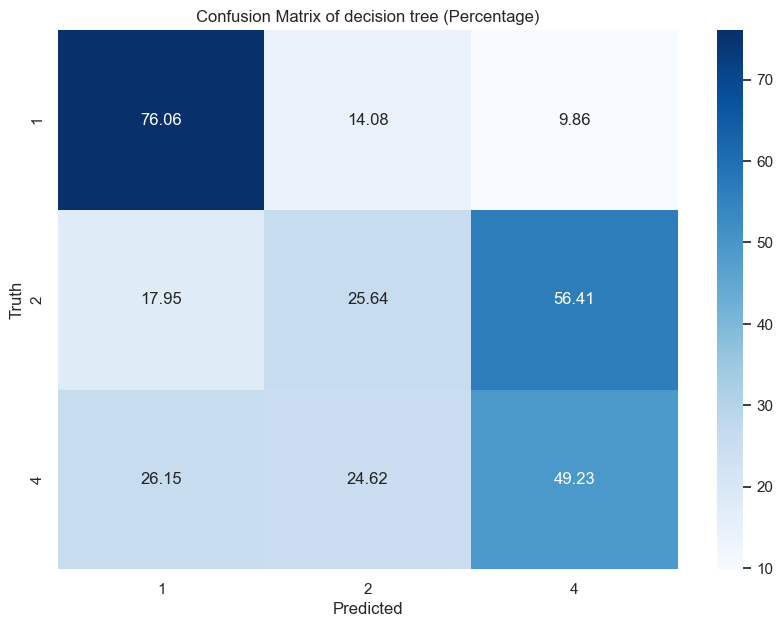

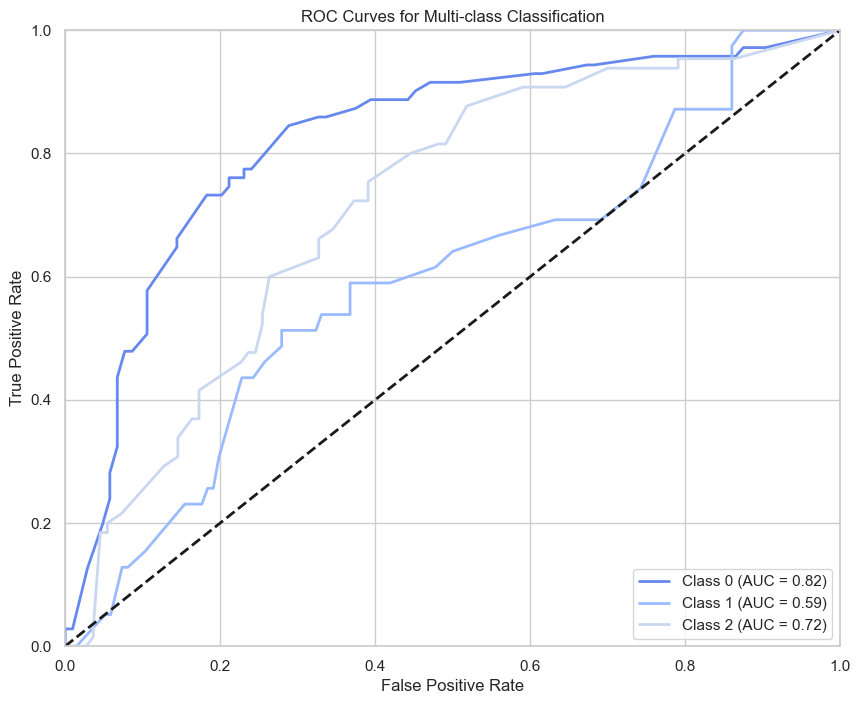

In [9]:
from sklearn.model_selection import GridSearchCV
# 使用网格法优化剪枝
from sklearn.metrics import recall_score, f1_score, classification_report

# 决策树分类器
# 分离特征和目标变量
# X = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征
X = data_no_g3[['MCQ', 'Q4', 'Q5']]  # 特征
y = data_no_g3['Programme']  # 目标变量（Programme）

# # 确保X的列名是字符串
# X.columns = X.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# criterion='entropy'
clf2 = DecisionTreeClassifier()

# 定义要搜索的参数网格  
param_grid = {  
    'max_depth': [i for i in range(2, 10, 1)],  
    'min_samples_split': [i for i in range(1, 25, 2)],  
    'min_samples_split': [i for i in range(1, 20, 1)],  
}
# param_grid = {  
#     'max_depth': [7],  
#     'min_samples_split': [8],  
#     'min_samples_leaf': [3],  
# } 

# 创建GridSearchCV实例  
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, n_jobs=8)  
# 使用GridSearchCV拟合数据  
grid_search.fit(X_train, y_train)  
# 获取最佳参数  
best_params = grid_search.best_params_  
print(f"Best parameters: {best_params}")  

# 获取最佳模型  
best_dt_model = grid_search.best_estimator_  
# 使用最佳模型进行预测  
y_pred = best_dt_model.predict(X_test)  


# 你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)


# 可视化决策树
class_names_str = [str(cls) for cls in sorted(y.unique())]  # 将类别转换为字符串
plt.figure(figsize=(25,10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, fontsize=12)
plt.title('Decision Tree showing the splits at each node')
plt.show()


import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of decision tree (Percentage)')  
plt.show()


# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# 随机森林

Best parameters: {'max_depth': 4, 'min_samples_split': 3}
              precision    recall  f1-score   support

           1       0.74      0.72      0.73        71
           2       0.42      0.28      0.34        39
           4       0.56      0.69      0.62        65

    accuracy                           0.61       175
   macro avg       0.57      0.56      0.56       175
weighted avg       0.60      0.61      0.60       175


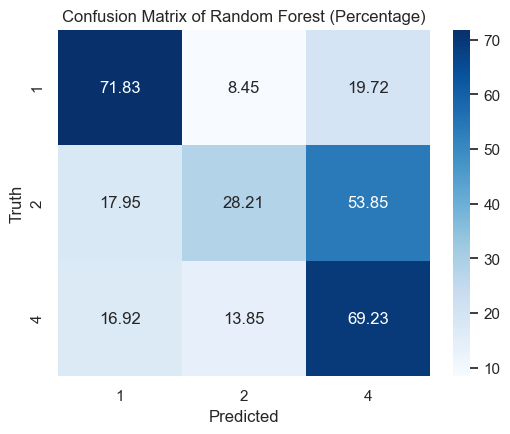

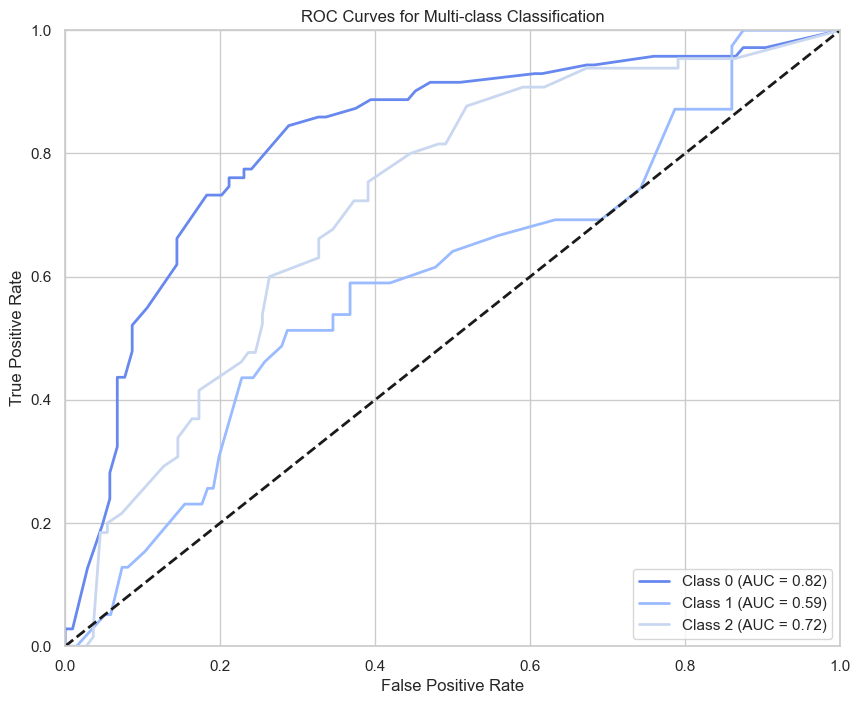

Accuracy: 0.6114285714285714
Precision: 0.6030900621118013
Recall: 0.6114285714285714
F1 Score: 0.6015622800844477


In [13]:
from sklearn.metrics import precision_score
# 使用随机森林分类
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  
  
# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量  
  
# 划分训练集和测试集  
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)  

from imblearn.under_sampling import RandomUnderSampler
# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_rf, y_resampled = undersample.fit_resample(X_train_rf, y_train)
  
  
  
  
  
# 定义参数网格  
param_grid = {  
    'n_estimators': [100, 200],  # 尝试不同数量的树  
    'max_depth': [None, 5, 10, 15],      # 尝试不同的最大深度  
    # 'min_samples_split': [1, 2, 3, 4, 10],  # 尝试不同的最小分裂样本数  
    # 'min_samples_leaf': [4, 5, 6],    # 尝试不同的叶子节点最小样本数  
    'random_state': [42]               # 保持随机状态一致以便比较  
}  
  
# 创建随机森林分类器实例  
rf_classifier = RandomForestClassifier()  
  
# 创建网格搜索对象  
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  
  
# 使用网格搜索进行参数优化和模型训练  
grid_search_rf.fit(X_resampled_rf, y_resampled)  
  
# 获取最佳参数  
best_params_rf = grid_search.best_params_  
print(f"Best parameters: {best_params_rf}")  
  
# 使用最佳参数重新训练模型  
best_rf_classifier = grid_search_rf.best_estimator_  
  
# 使用模型进行预测  
y_pred = best_rf_classifier.predict(X_test_rf)  
  
report = classification_report(y_test, y_pred)  
print(report)

import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of Random Forest (Percentage)')  
plt.show()

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# 计算精度、准确率、召回率和F1分数  
# 注意：precision_score, recall_score, f1_score 需要指定平均方法，例如 'macro', 'micro', 'weighted' 等  
# 这里我们使用 'macro' 作为示例，它计算每个类别的指标，然后找到它们的未加权平均值  
  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
  
# 打印结果  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1 Score:', f1)

# SVM -特征选择

Best parameters set found on development set:

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.438 (+/-0.011) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.477 (+/-0.021) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.469 (+/-0.029) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.619 (+/-0.092) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.543 (+/-0.071) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.617 (+/-0.084) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

Accuracy: 0.6381578947368421
precision: 0.5364581903376071
Recall: 0.6381578947368421
F1 Score: 0.5798939795531995
              precision    recall  f1-score   support

           1       0.70      0.74      0.72        68
           2       0.00      0.00      0.00        26
           4       0.58      0.81      0.68        58

    accuracy                           0.64       152
   macro avg       0.43      0.52      0.47       152
weighted avg    

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

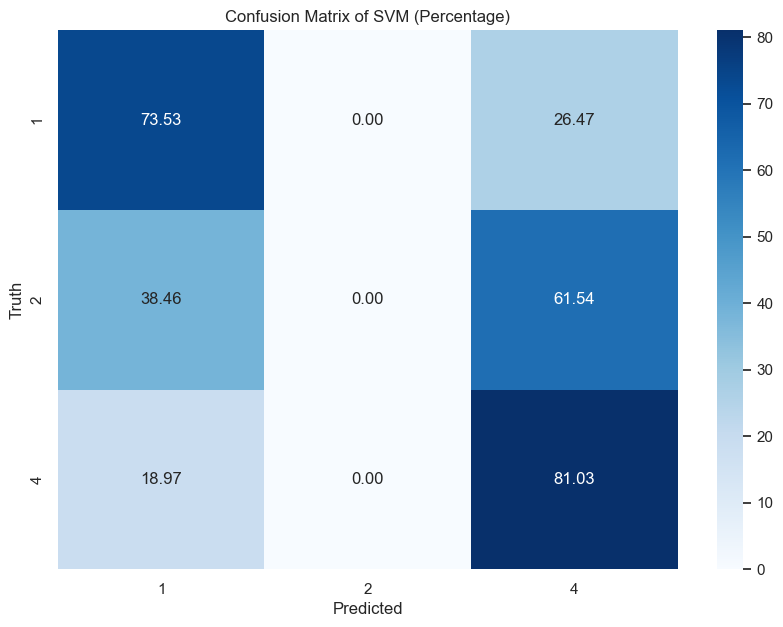

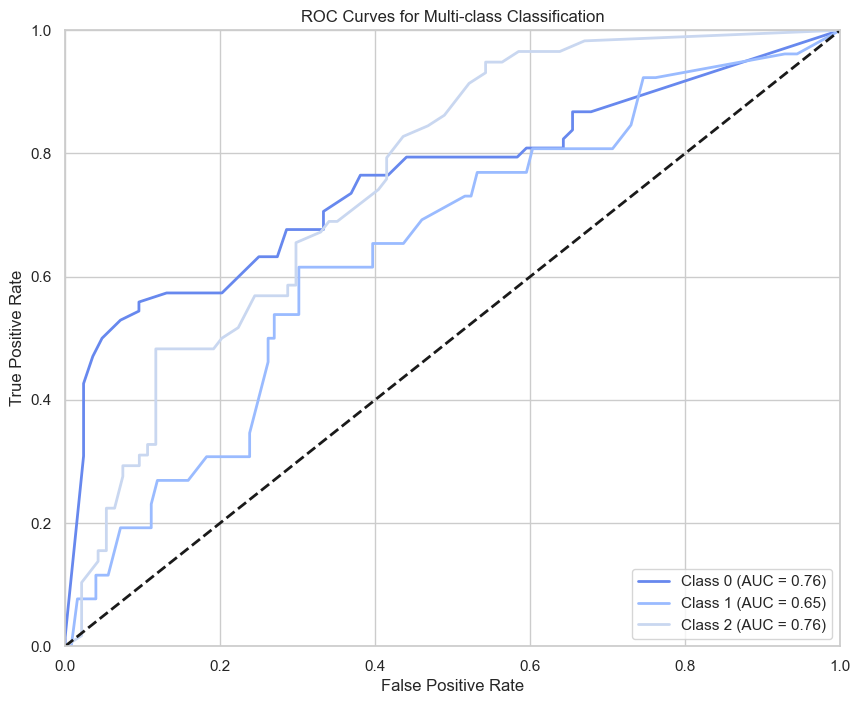

In [14]:
# SVM前的数据处理
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import IsolationForest  

# 去除['MCQ','Q1','Q2','Q3','Q4','Q5']列完全相同的行  
data_no_g3_drop_duplicates = data_no_g3.drop_duplicates(subset=['MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'])  
  
# 使用孤立森林检测异常值  
X_iso = data_no_g3_drop_duplicates.drop('Programme', axis=1)  # 特征变量  
y_iso = data_no_g3_drop_duplicates['Programme']  # 目标变量  
iso_clf = IsolationForest(contamination=0.08, random_state=42)  # 去除8%的异常值
y_iso_pred = iso_clf.fit_predict(X_iso)  
# 找出异常值的索引，-1表示异常值
outlier_indices = y_iso_pred == -1
# 去除异常值的行
X_clean = X_iso.loc[~outlier_indices]
y_clean = y_iso.loc[~outlier_indices]
# 确保X_clean和y_clean的行数相同  
assert len(X_clean) == len(y_clean), "X_clean and y_clean must have the same number of rows"
# print(X_clean)
# print(y_clean)
data_no_g3_drop_duplicates_cleaned = pd.DataFrame(pd.concat([X_clean, y_clean], axis=1))
# print(data_no_g3_drop_duplicates_cleaned)

# 提取除"Programme"列之外的所有特征列  
X_to_scale = data_no_g3_drop_duplicates_cleaned.drop('Programme', axis=1)  
# 初始化StandardScaler  
scaler = StandardScaler()  
# 对特征进行z-score缩放  
X_scaled = scaler.fit_transform(X_to_scale)  
# 将缩放后的特征转换为DataFrame，使用X_to_scale的列名  
X_scaled_df = pd.DataFrame(X_scaled, columns=X_to_scale.columns)
X_scaled_df.reset_index(drop=True, inplace=True)  
data_no_g3_drop_duplicates_cleaned['Programme'].reset_index(drop=True, inplace=True)
# 重新合并"Programme"列和标准化后的特征列  
data_no_g3_drop_duplicates_scaled_cleaned = pd.concat([X_scaled_df, data_no_g3_drop_duplicates_cleaned['Programme']], axis=1)
# print(data_no_g3_drop_duplicates_scaled_cleaned)

# 使用不同配置的svm进行分类
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score  
  
# 分离特征和目标变量
X = data_no_g3_drop_duplicates_scaled_cleaned[['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3']]  # 特征
y = data_no_g3_drop_duplicates_scaled_cleaned['Programme']  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.ensemble import BalancedBaggingClassifier
# # Step 3: Undersample majority class
# undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]

parameter_space = {
    'C': [0.01, 0.1],  # 误分类的惩罚参数  
    'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
    'kernel': ['rbf', 'poly','sigmoid']  # 核函数类型  
}

# 创建SVM分类器对象  
svc = svm.SVC() 

# 创建SVM分类器对象  
clf_svm_best = GridSearchCV(svc, parameter_space, cv=5, n_jobs=8)  # 使用5折交叉验证
  
# 训练模型并搜索最佳参数
clf_svm_best.fit(X_train, y_train)


# 打印最佳参数  
print("Best parameters set found on development set:")  
print()  
print(clf_svm_best.best_params_)  
print()  
print("Grid scores on development set:")  
print()  
means = clf_svm_best.cv_results_['mean_test_score']  
stds = clf_svm_best.cv_results_['std_test_score']  
for mean, std, params in zip(means, stds, clf_svm_best.cv_results_['params']):  
    print("%0.3f (+/-%0.03f) for %r"  
          % (mean, std * 2, params))  
print()  


# 使用最佳参数在测试集上进行预测  
y_pred = clf_svm_best.predict(X_test)  
  
# 计算准确度  
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
precision = precision_score(y_test, y_pred, average='weighted')
print(f"precision: {precision}")
recall = recall_score(y_test, y_pred, average='weighted')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred, average='weighted')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)


import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of SVM (Percentage)')  
plt.show()

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# 贝叶斯-特征选择

Naive Bayes Classifier (Under_sampled Data) Performance:
F1 Score: 0.6297012739304509
Confusion Matrix:
 [[69  7  9]
 [ 9 19 14]
 [20 13 38]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        85
           2       0.49      0.45      0.47        42
           4       0.62      0.54      0.58        71

    accuracy                           0.64       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.63      0.64      0.63       198


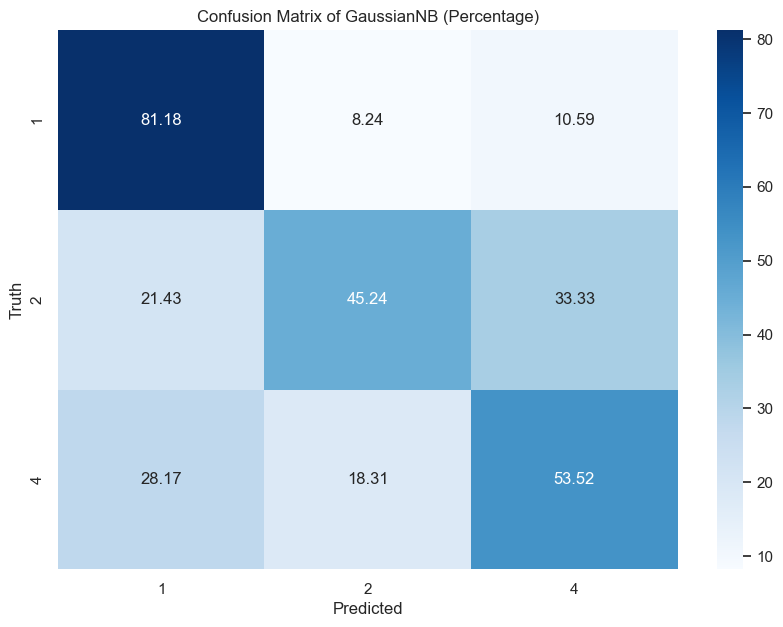

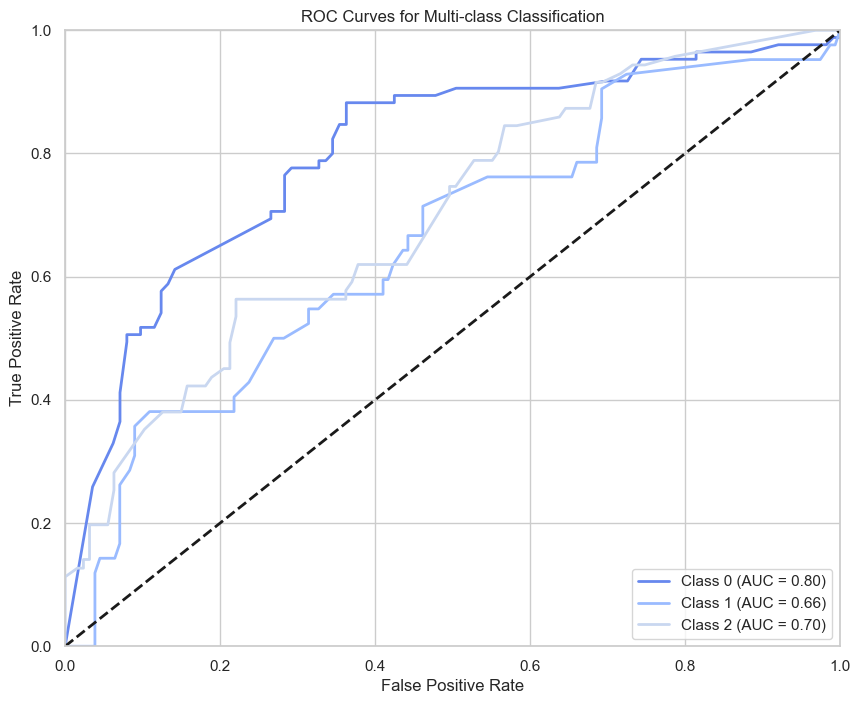

In [5]:
# 更换输入特征
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming data_no_g3 is your DataFrame containing the data

# Step 2: Prepare data
X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features
y = data_no_g3['Programme']  # Target variable
# 确保X的列名是字符串
X.columns = X.columns.astype(str)
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Step 5: Build and train the Naive Bayes classifier on under_sampled data
gnb_under_sampled = GaussianNB()
gnb_under_sampled.fit(X_resampled, y_resampled)

# Step 6: Evaluate the Naive Bayes classifier on test data
y_pred_under_sampled = gnb_under_sampled.predict(X_test)
f1_under_sampled = f1_score(y_test, y_pred_under_sampled, average='weighted')
conf_matrix_under_sampled = confusion_matrix(y_test, y_pred_under_sampled)
class_report_under_sampled = classification_report(y_test, y_pred_under_sampled)

print("Naive Bayes Classifier (Under_sampled Data) Performance:")
print("F1 Score:", f1_under_sampled)
print("Confusion Matrix:\n", conf_matrix_under_sampled)
print("Classification Report:\n", class_report_under_sampled)

# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_under_sampled)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of GaussianNB (Percentage)')  
plt.show()


# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# adaboost-特征选择

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters set found on development set:

{'learning_rate': 1.0, 'n_estimators': 22}
              precision    recall  f1-score   support

           1       0.80      0.55      0.65        71
           2       0.43      0.67      0.52        39
           4       0.63      0.63      0.63        65

    accuracy                           0.61       175
   macro avg       0.62      0.62      0.60       175
weighted avg       0.65      0.61      0.61       175


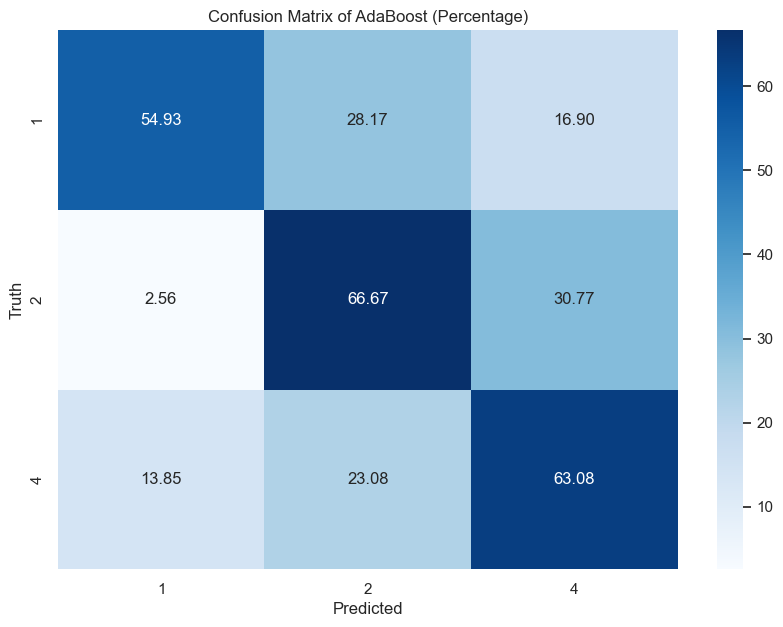

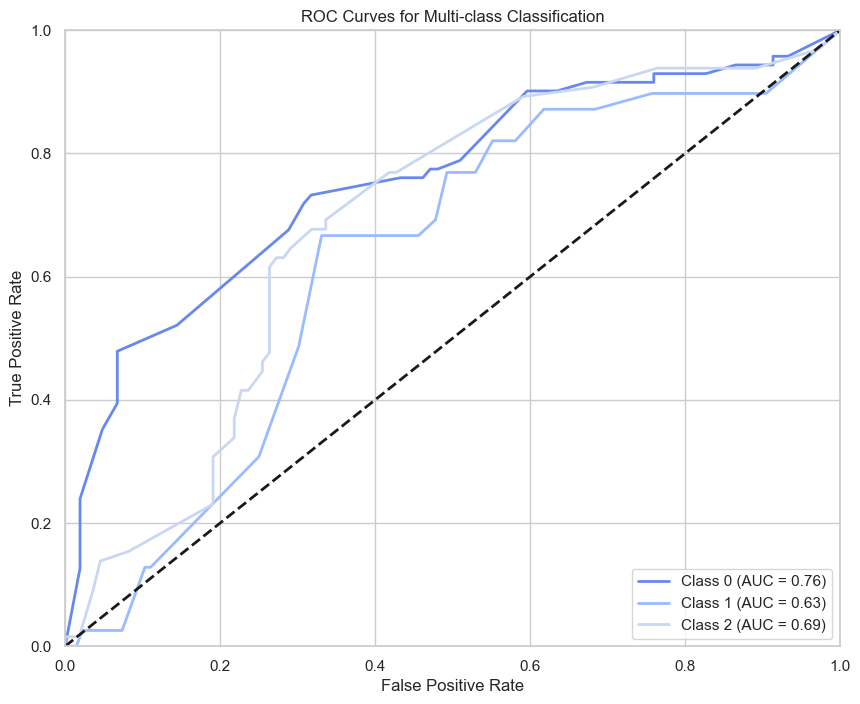

In [6]:
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.metrics import accuracy_score  
from imblearn.under_sampling import RandomUnderSampler  
  
# 假设你已经有了一个包含特征和标签的数据集  
# X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features  
X = data_no_g3[['Gender', 'MCQ', 'Q3']]  # Features  
y = data_no_g3['Programme']  # Target variable  
  
# 确保X的列名是字符串（如果它们不是已经是的话）  
X.columns = X.columns.astype(str)  
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
  
# Step 3: Undersample majority class  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)  

# 定义要搜索的超参数网格  
param_grid = {  
    'n_estimators': [i for i in range(10, 40, 1)],  # 尝试不同的弱学习器数量  
    'learning_rate': [1.0, 1.1, 1.2, 1.3],  # 尝试不同的学习率  
    # 你可以添加更多AdaBoostClassifier的超参数到param_grid中  
}
  
# Step 5: Build and train the AdaBoost classifier on under_sampled data  
# AdaBoostClassifier的默认基分类器是决策树桩（DecisionTreeClassifier(max_depth=1)）  
adb_under_sampled = AdaBoostClassifier(random_state=42, algorithm='SAMME')  
# 初始化GridSearchCV  
grid_search = GridSearchCV(estimator=adb_under_sampled, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# 在下采样后的数据上进行网格搜索  
grid_search.fit(X_resampled, y_resampled)
# 输出最佳参数  
print("Best parameters set found on development set:")  
print()  
print(grid_search.best_params_)

# 使用最佳参数构建最终的AdaBoost模型  
adb_best = AdaBoostClassifier(random_state=42, algorithm='SAMME', **grid_search.best_params_)  
adb_best.fit(X_resampled, y_resampled)  
  
# Step 6: Evaluate the AdaBoost classifier on test data  
y_pred_under_sampled = adb_best.predict(X_test)   


report = classification_report(y_test, y_pred_under_sampled)  
print(report)

from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_under_sampled)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of AdaBoost (Percentage)')  
plt.show()

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# 逻辑回归

Confusion Matrix:
    1  2   4
1  56  0  15
2  16  0  23
4  20  0  45
              precision    recall  f1-score   support

           1       0.80      0.55      0.65        71
           2       0.43      0.67      0.52        39
           4       0.63      0.63      0.63        65

    accuracy                           0.61       175
   macro avg       0.62      0.62      0.60       175
weighted avg       0.65      0.61      0.61       175


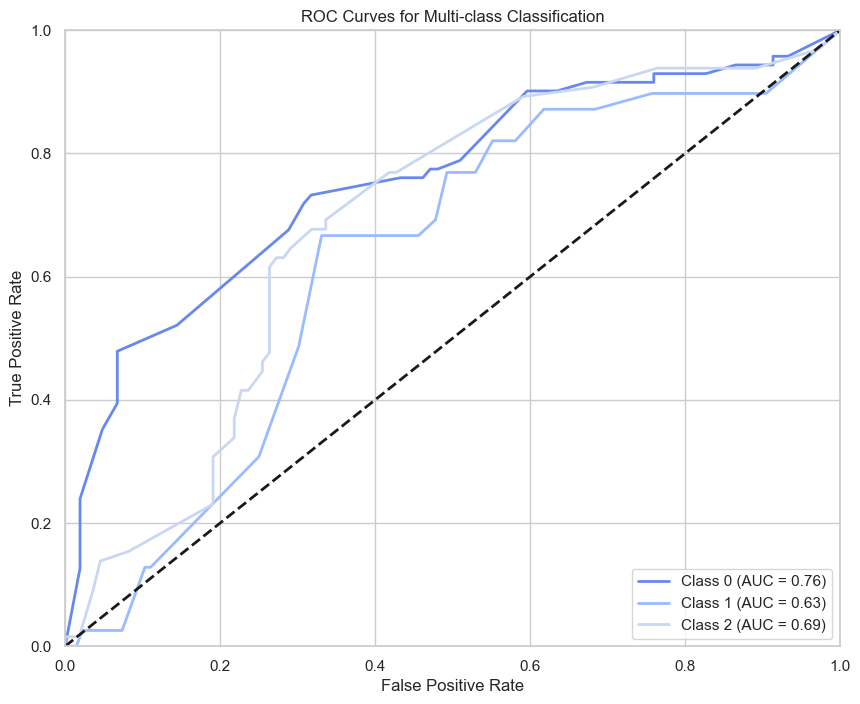

In [7]:
from sklearn.linear_model import LogisticRegression

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化逻辑回归模型
logistic_reg_model = LogisticRegression()

# 训练模型
logistic_reg_model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = logistic_reg_model.predict(X_test)

# 计算混淆矩阵并输出结果
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))
print("Confusion Matrix:")
print(conf_matrix_df)
print(report)

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# Stacking

In [8]:
# # 定义基学习器  
# base_learners = [  
#     ('dt', best_dt_model),
#     ('rf', best_rf_classifier),  
#     ('svm', clf_svm_best),
#     ('adaBoost', adb_best),
#     ('GNB', gnb_under_sampled),
# ]


# 特征集定义
features_dt = ['MCQ', 'Q1', 'Q3', 'Q4']
features_rf = ['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']
features_svm = ['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3']
features_nb = ['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
features_ada = ['Gender', 'MCQ', 'Q3']
# 定义特征字典，将每个模型对应的特征集合起来
features_dict = {
    'dt': features_dt,
    'rf': features_rf,
    'svm': features_svm,
    'GNB': features_nb,
    'adaBoost': features_ada
}


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 定义第一阶段的基本模型
base_models = [  
    ('dt', best_dt_model),
    ('rf', best_rf_classifier),  
    ('svm', clf_svm_best),
    ('adaBoost', adb_best),
    ('GNB', gnb_under_sampled),
]

# 定义第二阶段的元模型
meta_model = LogisticRegression()

# 初始化训练集和测试集的预测结果矩阵
train_meta = np.zeros((len(X_train), len(base_models)))
test_meta = np.zeros((len(X_test), len(base_models)))

# 对每个基本模型进行训练和预测
for i, (name, model) in enumerate(base_models):
    model.fit(X_train[features_dict[name]], y_train)
    train_meta[:, i] = model.predict(X_train[features_dict[name]])
    test_meta[:, i] = model.predict(X_test[features_dict[name]])

# 训练元模型
meta_model.fit(train_meta, y_train)

# 使用元模型进行预测
final_pred_stacking = meta_model.predict(test_meta)

# 计算性能指标
print("Classification Report:")
print(classification_report(y_test, final_pred_stacking))

# 计算混淆矩阵并可视化
conf_mat_stacking = confusion_matrix(y_test, final_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Stacking)')
plt.show()




KeyError: "['Q1', 'Q4'] not in index"

# voting

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.82      0.72        71
           2       0.38      0.08      0.13        39
           4       0.54      0.65      0.59        65

    accuracy                           0.59       175
   macro avg       0.52      0.51      0.48       175
weighted avg       0.55      0.59      0.54       175


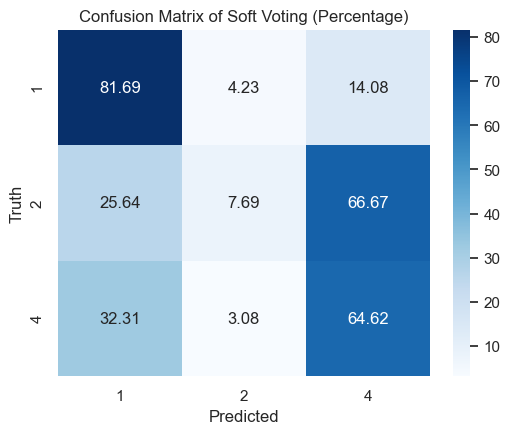

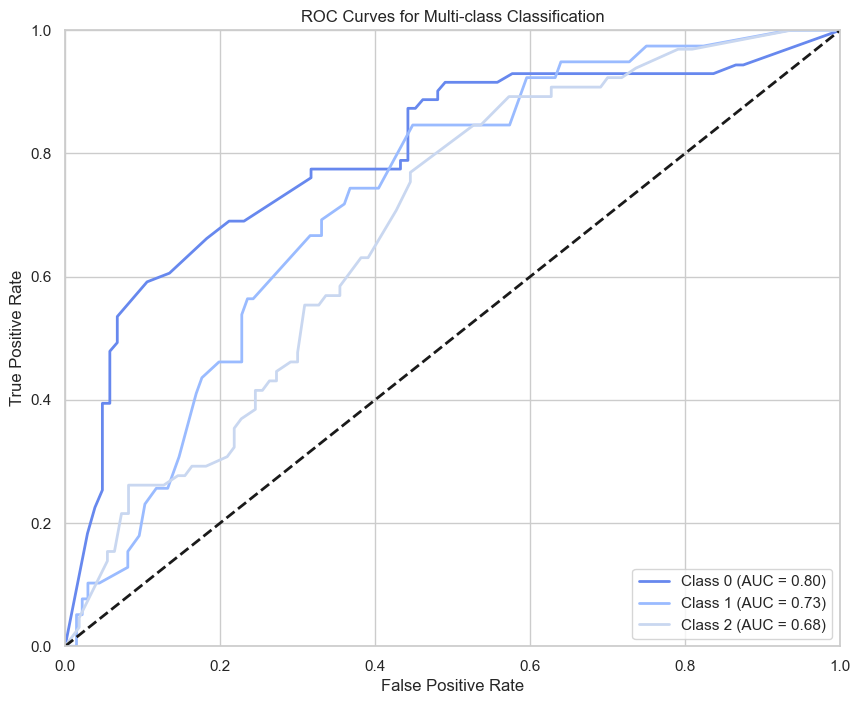

Accuracy: 0.5885714285714285
precision: 0.5479695024077047
Recall: 0.5885714285714285
F1 Score: 0.5407745233489915


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier


# 假设你已经有了一个包含特征和标签的数据集  
X = data_no_g3[['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features   
y = data_no_g3['Programme']  # Target variable 

# 特征集定义
features_dt = ['MCQ', 'Q1', 'Q3', 'Q4']
features_rf = ['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']
features_svm = ['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3']
features_nb = ['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
features_ada = ['Gender', 'MCQ', 'Q3']

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 设置软投票分类器，这些分类器都训练好了
voting_clf = VotingClassifier(
    estimators=[
                ('dt', best_dt_model),
                ('rf', best_rf_classifier),
                # ('svm', clf_svm_best), 
                ('nb', gnb_under_sampled), 
                ('adaBoost', adb_best),
                ],
    voting='hard',
    weights=[1,1,4,4]
)

# 为每个模型训练不同的特征子集需要在拟合前对数据进行处理
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('dt', 'passthrough', features_dt),
        ('rf', 'passthrough', features_rf),
        # ('svm', 'passthrough', features_svm),
        ('nb', 'passthrough', features_nb),
        ('adaBoost', 'passthrough', features_ada)
    ])

# 转换数据
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 训练软投票分类器
voting_clf.fit(X_train_transformed, y_train)

# 预测测试集结果
final_pred = voting_clf.predict(X_test_transformed)

# 计算性能指标
print("Classification Report:")
print(classification_report(y_test, final_pred))

from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test, final_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')
plt.title('Confusion Matrix of Soft Voting (Percentage)')  
plt.show()

# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

# 计算准确度  
accuracy = accuracy_score(y_test, final_pred)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
precision = precision_score(y_test, final_pred, average='weighted')
print(f"precision: {precision}")
recall = recall_score(y_test, final_pred, average='weighted')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, final_pred, average='weighted')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")